In [1]:
import warnings

warnings.filterwarnings("ignore")

# <font color="#229966">Introducción a la Estadística Espacial</font>

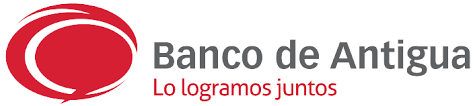


## <font color="#229966">Gráficos y mapas en Python con geopandas y matplotlib</font>

Aprenderemos cómo cargar, manipular y visualizar datos espaciales. En algunos sentidos, los datos espaciales se han vuelto tan omnipresentes que hoy en día, por lo general, se incluyen simplemente como "una columna más" en una tabla. Sin embargo, el espacio es especial a veces y hay algunos aspectos en los que los datos geográficos difieren de las tablas numéricas estándar. 

En esta práctica de laboratorio aprenderá a hacer mapas pulidos como este con solo unos pocos comandos:

## <font color="#229966">AYUDA</font>

La biblioteca principal empleada para todo esto es <font color="#229966">**geopandas**</font>, que es una extensión geoespacial de la biblioteca de pandas.

Geopandas admite exactamente la misma funcionalidad que pandas (de hecho, ya que está construida encima, por lo que la mayoría de los objetos subyacentes son de pandas), más una amplia gama de contrapartes espaciales que hacen manipulación general de datos espaciales tan fácil como tablas no-espaciales. 


Como las mamushkas, geopandas es una muñeca rusa que adentro contiene pandas.

In [2]:
# importamos las librerías que veníamos trabajando
import pandas as pd
import numpy as np
import seaborn as sns

# y sumamos las que vamos a necesitar
import geopandas as gpd
import shapely

In [3]:
from pathlib import Path

DATA_PATH = Path().cwd().parent.absolute() / "data"

In [4]:
# Abrimos nuestro dataset espacial a partir de un archivo en el formato mas tradicional: ESRI shapefile 
estaciones = gpd.read_file(DATA_PATH / "subte/estaciones_de_subte.shp")
# y visualizamos las primeras líneas
estaciones.head()

,ID,ESTACION,LINEA,geometry
0,1.0,CASEROS,H,POINT (105902.351 99279.282)
1,2.0,INCLAN,H,POINT (105715.554 99986.549)
2,3.0,HUMBERTO 1°,H,POINT (105591.888 100683.658)
3,4.0,VENEZUELA,H,POINT (105371.474 101554.635)
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (105252.211 102254.351)


In [5]:
#es muy similiar a pandas dataframe. vemos su tipo y vemos que es una especia de data frame
type(estaciones)

geopandas.geodataframe.GeoDataFrame

In [6]:
#tiene las mismas propiedades
estaciones.shape

(86, 4)

In [7]:
# podemos también pedir la información de qué almacena este dataset
estaciones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        86 non-null     float64 
 1   ESTACION  86 non-null     object  
 2   LINEA     86 non-null     object  
 3   geometry  86 non-null     geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 2.8+ KB


In [8]:
# podemos inspeccionar los índices es decir la cantidad de filas de la base
estaciones.index

RangeIndex(start=0, stop=86, step=1)

In [9]:
# También podemos inspeccionar cuáles son las columnas de la base
estaciones.columns

Index(['ID', 'ESTACION', 'LINEA', 'geometry'], dtype='object')

### En las columnas vemos ya el elemento que hace a este data frame algo diferente a los de pandas: el campo geometry

In [10]:
#Inspeccionamos la geometría que provee la base
estaciones.geometry.head()

0     POINT (105902.351 99279.282)
1     POINT (105715.554 99986.549)
2    POINT (105591.888 100683.658)
3    POINT (105371.474 101554.635)
4    POINT (105252.211 102254.351)
Name: geometry, dtype: geometry

Pero a pesar de ser el elemento que diferencia un DataFrame de un GeoDataFrame, guarda similitud con un objeto conocido de Pandas
, **geometry** es una **geoseries**, similar a una serie de pandas.

In [11]:
# consulamos el tipo de variable que es geometry
type(estaciones.geometry)

geopandas.geoseries.GeoSeries

In [12]:
#es una geoSerie de que? que elementos la componen?
estaciones.geometry.iloc[0:2]

0    POINT (105902.351 99279.282)
1    POINT (105715.554 99986.549)
Name: geometry, dtype: geometry

In [13]:
# ahora veamos cómo accedemos al primer objeto de la geometría
print(estaciones.geometry.iloc[0])

POINT (105902.35136369725 99279.28209795424)


In [14]:
# Es un objeto Shapely. La librería que funciona por debajo de GeoPandas 
type(estaciones.geometry.iloc[0])

shapely.geometry.point.Point

# <font color="#229966">Shapely</font >

Las GeoSeries de Geopandas son una Series que adentro contiene objetos que no son ni string, ni numeros. 

Son objetos particulares, como los datetime, pero cuyas propiedades específicas son geográficas. 

En lugar de extraer horas o días de la semana, vamos a poder obtener propiedades geográficas como distancias de un punto a otro. O coordenadas.

# <font color="#229966">Coordenadas</font>

Es lo fundamental los GeoDatos, no dejan de ser los datos que trabajamos cotidianamente, pero con alguna referencia a su <font color="#229966">**ubicación en el espacio**</font>, que creemos relevante por lo cual la introducimos en el análisis. 

Esa referencia al espacio debe corporizarse en algun tipo de objeto geografico, de los cuales utilizaremos 3 básicos:

 - Punto
 - Línea
 - Polígono

 - 
En este primer ejemplo, la estaciones de subte son puntos.

El puntos es el elemento geográfico más sencillo. 

En la geometría euclidiana, o de dos dimensiones, un punto se define por dos valores: sus coordenadas x e y.


### Un punto está constituido por dos coordenadas en el espacio

In [15]:
# vamos a acceder a las dos coordenadas del punto
print("x =", estaciones.geometry.iloc[0].x, "y =", estaciones.geometry.iloc[0].y)

x = 105902.35136369725 y = 99279.28209795424


In [16]:
# Para no ver tantos decimales
print(
    "x =",
    estaciones.geometry.iloc[0].x.round(2),
    "y =",
    estaciones.geometry.iloc[0].y.round(2),
)


x = 105902.35 y = 99279.28


# <font color="darkred">**Ojo** que lo que siempre en matematica se llama x y y en ese orden</font>

En geografia siempre se llamo latlong, pero **x es long** y **y es lat**. El orden cambia! latlong

La latitud (expresada como Y) proporciona la localización de un lugar en dirección Norte o Sur desde el Ecuador.

La longitud (expresada com X) proporciona la localización de un lugar en dirección Este u Oeste desde el Meridiano de Greenwich.

 - Pero es algo diferente a lo que siempre conocimos como latlong. 

 - En general estamos acostumbrados en mapas de Buenos Aires a ver valores como -34 y -58. 

 - La diferencia se explica por la llamada proyeccion de coordenadas que da cuenta de la transformación de un objeto en 3 dimensiones (como el planeta Tierra) en un plano de 2 dimensiones (el mapa). 


 - Esta proyección también regula las unidades de medidas de los ejes donde proyectamos. Puede estar en grados o en metros.

 - Podemos acceder a la proyeccion de coordenadas de un GeoDataFrame de manera sencilla.

In [17]:
#con el metodo o funcion crs vemos la proyeccion de nuestro objeto
estaciones.crs

<Projected CRS: PROJCS["Argentina_GKBsAs",GEOGCS["Campo Inchauspe" ...>
Name: Argentina_GKBsAs
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Campo Inchauspe
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

La proyeccion de este GeoDataFrame está en un formato de coordenadas especifica SR-ORG:7124: Gauss-Kruger Bs.As. P

Queremos reproyectarla en EPSG 4326 cuya unidad de medida es grados.


Afortunadamente GeoPandas implementa esto de una manera muy sencilla. 

In [18]:
# Cambiamos al formato tradicional de latlong
estaciones = estaciones.to_crs("epsg:4326")
estaciones.head()

,ID,ESTACION,LINEA,geometry
0,1.0,CASEROS,H,POINT (-58.39893 -34.63575)
1,2.0,INCLAN,H,POINT (-58.40097 -34.62938)
2,3.0,HUMBERTO 1°,H,POINT (-58.40232 -34.62309)
3,4.0,VENEZUELA,H,POINT (-58.40473 -34.61524)
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40604 -34.60894)


In [19]:
estaciones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
print(estaciones.geometry.iloc[0])

POINT (-58.39892758536007 -34.63575018034302)


Ya podemos ver que ***las coordenadas de nuestros puntos se asemejan a los valores que intuitivamente conocíamos*** para Buenos Aires. 

A partir de este momento, intentaremos ***visualizar todos los procesos que realizamos en un mapa***. 


Para esto necesitamos la librería de Python que administra los gráficos: **matplotlib**

In [21]:
# Sumamos la libreria que nos permite visualizar co alias plt
import matplotlib.pyplot as plt

In [22]:
#Definimos una función que extrae la coordenada x de un punto

def extraer_x(coord):
    return coord.x

In [23]:
# utilizando el metodo map, puedo extraer para cada punto sus coordenadas en x
estaciones["x"] = estaciones.geometry.map(lambda g: g.x)

# puedo usar la función definida recientemente
estaciones["x_2"] = estaciones.geometry.map(extraer_x)

# Visualicemos qué hizo
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,x_2
0,1.0,CASEROS,H,POINT (-58.39893 -34.63575),-58.398928,-58.398928
1,2.0,INCLAN,H,POINT (-58.40097 -34.62938),-58.400970,-58.400970
2,3.0,HUMBERTO 1°,H,POINT (-58.40232 -34.62309),-58.402323,-58.402323
3,4.0,VENEZUELA,H,POINT (-58.40473 -34.61524),-58.404732,-58.404732
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40604 -34.60894),-58.406036,-58.406036


In [24]:
# Dado que ambas instrucciones produjeron el mismo resultado, por simplicidad eliminamos la columna duplicada
estaciones.drop("x_2", axis=1, inplace=True)

# visualicemos la base actualizada
estaciones.head()

,ID,ESTACION,LINEA,geometry,x
0,1.0,CASEROS,H,POINT (-58.39893 -34.63575),-58.398928
1,2.0,INCLAN,H,POINT (-58.40097 -34.62938),-58.400970
2,3.0,HUMBERTO 1°,H,POINT (-58.40232 -34.62309),-58.402323
3,4.0,VENEZUELA,H,POINT (-58.40473 -34.61524),-58.404732
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40604 -34.60894),-58.406036


Afortunadamente, los desarolladores de GeoPandas entendieron que esto es una tarea cotidiana y pusieron como método propio de las geoSeries extraer las coordenadas

In [25]:
estaciones["y"] = estaciones.geometry.y
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y
0,1.0,CASEROS,H,POINT (-58.39893 -34.63575),-58.398928,-34.635750
1,2.0,INCLAN,H,POINT (-58.40097 -34.62938),-58.400970,-34.629376
2,3.0,HUMBERTO 1°,H,POINT (-58.40232 -34.62309),-58.402323,-34.623092
3,4.0,VENEZUELA,H,POINT (-58.40473 -34.61524),-58.404732,-34.615242
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40604 -34.60894),-58.406036,-34.608935


Utilizando estas coordenadas podemos visualizar la ubicacion de nuestras estaciones en un mapa, visualizandolas sobre el eje de coordenadas utilizando su posicion en x e y

Este es el mapa de la red de subterráneos de Buenos Aires

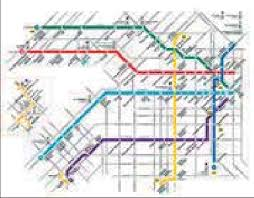

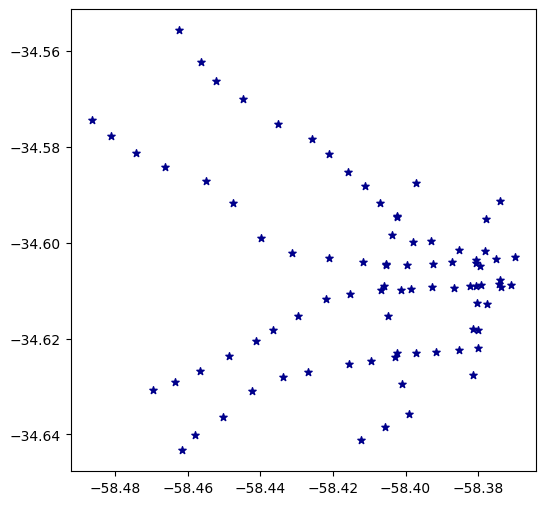

In [26]:
# establecemos el tamaño de la figura
fig = plt.figure(figsize=(6, 6))

# le agregamos un gráfico
ax = fig.add_subplot(1, 1, 1)

# definimos un scatter plot donde la x y la y son las coordenadas geográficas de las estaciones, color azul oscuro con estrellitas como símbolos
ax.scatter(estaciones.x, estaciones.y, color="darkblue", s=30, marker="*")

Al igual que los DataFrames de Pandas, los **GeoDataFrames** tienen un **método (o función) plot** que permite visualizar los objetos espaciales.

<Axes: >

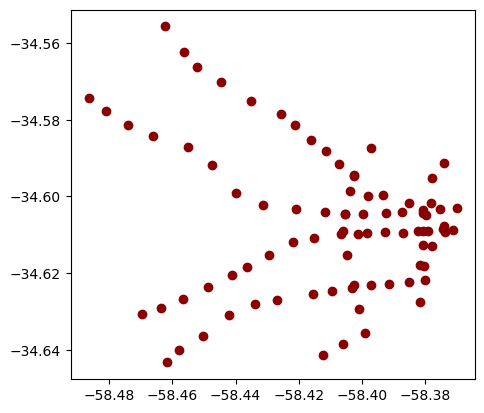

In [27]:
# Con la función drop() se eliminan las columnas 'x' y 'y'  # del DataFrame estaciones a lo largo del eje 1 (las columnas).
# Luego de eliminar esas columnas, se está llamando al método plot()

estaciones.drop(["x", "y"], axis=1).plot(color="darkred", marker="o")

In [28]:
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y
0,1.0,CASEROS,H,POINT (-58.39893 -34.63575),-58.398928,-34.635750
1,2.0,INCLAN,H,POINT (-58.40097 -34.62938),-58.400970,-34.629376
2,3.0,HUMBERTO 1°,H,POINT (-58.40232 -34.62309),-58.402323,-34.623092
3,4.0,VENEZUELA,H,POINT (-58.40473 -34.61524),-58.404732,-34.615242
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40604 -34.60894),-58.406036,-34.608935


# <font color="#229966">Procesos de seleccion en geopandas</font>

<Axes: >

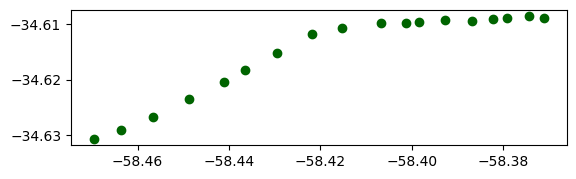

In [29]:
# Podemos seleccionar por ejemplo una línea de subte, elegimos la línea A (filtramos las filas correspondientes!)

estaciones.loc[estaciones.LINEA == "A", :].plot(color="darkgreen")

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Guardamos en una nueva base las estaciones correspondientes a la línea A

linea_A = estaciones.loc[estaciones.LINEA == "A", :]
linea_A

,ID,ESTACION,LINEA,geometry,x,y
30,31.0,PERU,A,POINT (-58.37427 -34.60856),-58.374268,-34.608559
31,32.0,PIEDRAS,A,POINT (-58.37909 -34.60888),-58.379085,-34.608882
32,33.0,LIMA,A,POINT (-58.38223 -34.60910),-58.382232,-34.609100
33,34.0,SAENZ PEÑA,A,POINT (-58.38678 -34.60941),-58.386777,-34.609413
34,35.0,CONGRESO,A,POINT (-58.39267 -34.60923),-58.392669,-34.609226
35,36.0,PASCO,A,POINT (-58.39843 -34.60965),-58.398427,-34.609646
36,37.0,ALBERTI,A,POINT (-58.40121 -34.60983),-58.401208,-34.609834
37,38.0,PLAZA DE MISERERE,A,POINT (-58.40671 -34.60982),-58.406707,-34.609817
38,39.0,LORIA,A,POINT (-58.41519 -34.61078),-58.415186,-34.610782
39,40.0,CASTRO BARROS,A,POINT (-58.42182 -34.61177),-58.421816,-34.611770


# <font color="#229966">Ejercicio 1</font>

a) Seleccionar la línea B y guardar en un archivo sus estaciones.

b) Inspeccionar en esta nueva base las filas y columnas, el tipo de datos, mostrar algunas filas.

c) Representar las estaciones de esta línea con un color y símbolo a elección


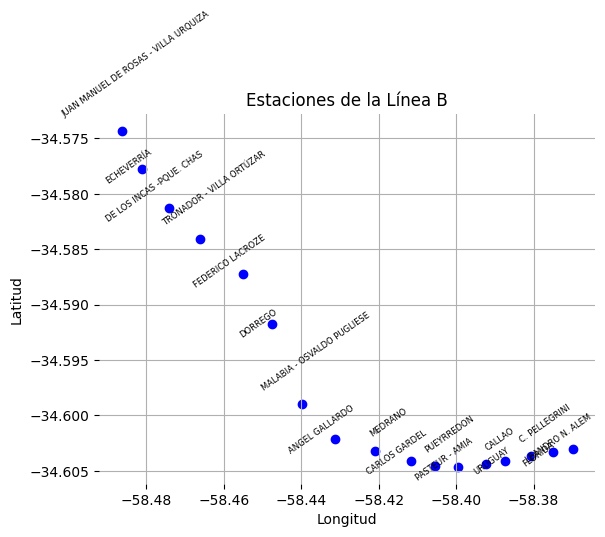

In [31]:
import matplotlib.pyplot as plt

# Vamos a agregar etiquetas con los nombres de las estaciones de esta línea.

# Datos de la línea B
linea_B = estaciones.loc[estaciones.LINEA == "B", :]

# Crear el gráfico
fig, ax = plt.subplots()

# Graficar cada punto
ax.scatter(linea_B["x"], linea_B["y"], color="blue")

# Añadir etiquetas a los puntos con offsets variables para evitar superposición
for idx, row in linea_B.iterrows():
    x_offset = 10 if idx % 2 == 0 else -10  # Alternar el offset en x
    y_offset = 10 if idx % 2 == 0 else -10  # Alternar el offset en y
    ax.annotate(
        row["ESTACION"],
        (row["x"], row["y"]),
        textcoords="offset points",
        xytext=(x_offset, y_offset),
        fontsize=6,
        rotation=35,
        ha="center",
    )

# Ajustar la visualización
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Estaciones de la Línea B")
ax.grid(True)

# Eliminar el borde de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

<Axes: >

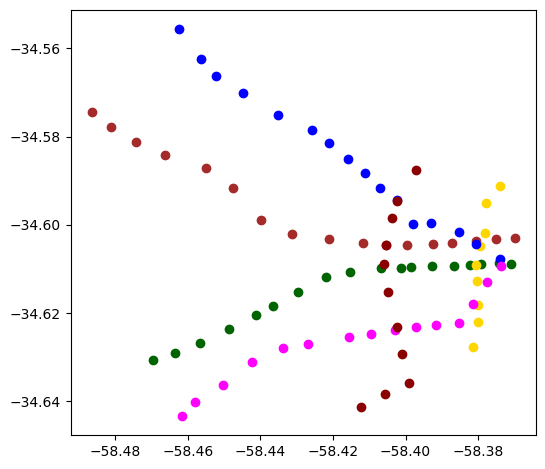

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

# Vamos a visualizar cada línea con un color distinto

estaciones.loc[estaciones.LINEA == "A", :].plot(ax=ax, color="darkgreen")
estaciones.loc[estaciones.LINEA == "B", :].plot(ax=ax, color="brown")
estaciones.loc[estaciones.LINEA == "C", :].plot(ax=ax, color="gold")
estaciones.loc[estaciones.LINEA == "D", :].plot(ax=ax, color="blue")
estaciones.loc[estaciones.LINEA == "E", :].plot(ax=ax, color="magenta")
estaciones.loc[estaciones.LINEA == "H", :].plot(ax=ax, color="darkred")


# <font color="#226699">Distancias</font>

Pero lo mejor es poder realizar procesos espaciales. 

Por ejemplo, podemos ver utilizar una harramienta de análisis básica y fundamental del análisis espacial para los objetos de tipo punto: la distancia euclidiana.

$$d_E(P_0,P_1)=\sqrt{(x_0-x_1)^2+(y_0-y_1)^2}$$

Vamos a calcular distancias como si no hubiera implementado un método, usando simplemente el concepto de distancia euclídea.

In [33]:
import math

constitucion = estaciones.loc[estaciones.ESTACION == "CONSTITUCION", :]
retiro = estaciones.loc[estaciones.ESTACION == "RETIRO", :]

# calculamos la distancia euclidea entre estas dos estaciones.

math.sqrt(
    (retiro.x.iloc[0] - constitucion.x.iloc[0]) ** 2
    + (retiro.y.iloc[0] - constitucion.y.iloc[0]) ** 2
)

0.03717294468299427

Veamos algunas cosas que acaban de suceder. En primer lugar que significa 0.03? 

En que unidades de medidas se encuentra? 

Esto depende de la proyeccion de coordenadas que utilizamos

In [34]:
estaciones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

La proyeccion de este GeoDataFrame está en EPSG 4326 cuya unidad de medida es grados. Hay muchas proyecciones que utilizan metros. Como la proyeción óptima depende de la ubicación en el planeta donde hagamos nuestro análisis, podemos utilizar una sencilla de alcance global como la EPSG 3857.

In [35]:
# convertirmos todo nuestro dataset a una proyeccion con unidades en metros. Luego veremos en mas detalle
estaciones = estaciones.to_crs(epsg=3857)
estaciones

,ID,ESTACION,LINEA,geometry,x,y
0,1.0,CASEROS,H,POINT (-6500938.882 -4114490.565),-58.398928,-34.635750
1,2.0,INCLAN,H,POINT (-6501166.193 -4113628.148),-58.400970,-34.629376
2,3.0,HUMBERTO 1°,H,POINT (-6501316.827 -4112778.132),-58.402323,-34.623092
3,4.0,VENEZUELA,H,POINT (-6501584.995 -4111716.244),-58.404732,-34.615242
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-6501730.229 -4110863.185),-58.406036,-34.608935
...,...,...,...,...,...,...
81,83.0,SAN PEDRITO,A,POINT (-6508810.510 -4113808.273),-58.469640,-34.630707
82,82.0,SAN JOSÉ DE FLORES,A,POINT (-6508131.560 -4113589.127),-58.463541,-34.629087
83,84.0,CÓRDOBA,H,POINT (-6501472.537 -4109445.808),-58.403721,-34.598455
84,85.0,LAS HERAS,H,POINT (-6500748.302 -4107959.183),-58.397216,-34.587462


In [36]:
# Con los datos convertidos en metros realizamos una operación similar a la anterior

estaciones["ym"] = estaciones.geometry.y
estaciones["xm"] = estaciones.geometry.x
estaciones.head()


,ID,ESTACION,LINEA,geometry,x,y,ym,xm
0,1.0,CASEROS,H,POINT (-6500938.882 -4114490.565),-58.398928,-34.635750,-4.114491e+06,-6.500939e+06
1,2.0,INCLAN,H,POINT (-6501166.193 -4113628.148),-58.400970,-34.629376,-4.113628e+06,-6.501166e+06
2,3.0,HUMBERTO 1°,H,POINT (-6501316.827 -4112778.132),-58.402323,-34.623092,-4.112778e+06,-6.501317e+06
3,4.0,VENEZUELA,H,POINT (-6501584.995 -4111716.244),-58.404732,-34.615242,-4.111716e+06,-6.501585e+06
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-6501730.229 -4110863.185),-58.406036,-34.608935,-4.110863e+06,-6.501730e+06


In [37]:
import math 

# Ahora calculamos la distancia pero el resultado estará en metros

constitucion_m = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION','geometry'].iloc[0]
retiro_m = estaciones.loc[estaciones.ESTACION == 'RETIRO','geometry'].iloc[0]
math.sqrt((retiro_m.x - constitucion_m.x)**2 + (retiro_m.y - constitucion_m.y)**2)

4995.3888866514335

In [38]:
# Necesitamos calcular la distancia de nuestras estaciones con respecto a algo, no existe la distancia a la nada
from shapely.geometry import Point

# definimos un punto con las coordenadas del obelisto

obelisco = Point(-6499048.3, -4110245.4)


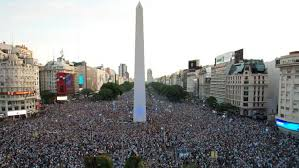

In [39]:
# ahora calculamos la distancia de la Estación Constitución a la Estación Retiro
constitucion_m.distance(retiro_m)

4995.3888866514335

In [40]:
# Calculemos ahora la distancia de las estaciones al obelisco
# afortunadamente GeoPandas puede aplicar este metodo a toda la Serie

estaciones["distancia_obelisco"] = estaciones.geometry.distance(obelisco)
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y,ym,xm,distancia_obelisco
0,1.0,CASEROS,H,POINT (-6500938.882 -4114490.565),-58.398928,-34.635750,-4.114491e+06,-6.500939e+06,4647.120236
1,2.0,INCLAN,H,POINT (-6501166.193 -4113628.148),-58.400970,-34.629376,-4.113628e+06,-6.501166e+06,3991.046605
2,3.0,HUMBERTO 1°,H,POINT (-6501316.827 -4112778.132),-58.402323,-34.623092,-4.112778e+06,-6.501317e+06,3400.139468
3,4.0,VENEZUELA,H,POINT (-6501584.995 -4111716.244),-58.404732,-34.615242,-4.111716e+06,-6.501585e+06,2932.269095
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-6501730.229 -4110863.185),-58.406036,-34.608935,-4.110863e+06,-6.501730e+06,2752.163162


Text(0.5, 1.0, 'Estaciones de subte y distancia al Obelisco')

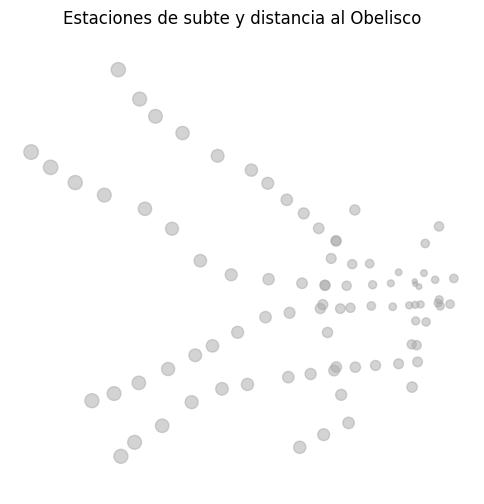

In [41]:
from shapely.geometry import Point
import geopandas as gpd

# veamos en un mapa las estaciones representadas en función de su distancia al obelisco
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)

estaciones.plot(
    ax=ax, color="darkgrey", markersize=(estaciones.distancia_obelisco**0.5), alpha=0.5
)

ax.set_axis_off()
plt.axis("equal")
ax.set_title("Estaciones de subte y distancia al Obelisco")

# <font color="#229966">Ejercicio 2</font>

a) Definir un punto en la estación Constitución

b) Calcular la distancia de cada estación a Constitución

c) Graficar en función de la distancia a Constitución


In [42]:
# esto devuelve un data frame
estaciones.iloc[[0], [1]]

,ESTACION
0,CASEROS


In [43]:
# este es un dataframe pero ahora con todas las filas y seleccionadas 3 columnas
estaciones.iloc[:, [1, 2, 3]]

,ESTACION,LINEA,geometry
0,CASEROS,H,POINT (-6500938.882 -4114490.565)
1,INCLAN,H,POINT (-6501166.193 -4113628.148)
2,HUMBERTO 1°,H,POINT (-6501316.827 -4112778.132)
3,VENEZUELA,H,POINT (-6501584.995 -4111716.244)
4,ONCE - 30 DE DICIEMBRE,H,POINT (-6501730.229 -4110863.185)
...,...,...,...
81,SAN PEDRITO,A,POINT (-6508810.510 -4113808.273)
82,SAN JOSÉ DE FLORES,A,POINT (-6508131.560 -4113589.127)
83,CÓRDOBA,H,POINT (-6501472.537 -4109445.808)
84,LAS HERAS,H,POINT (-6500748.302 -4107959.183)


In [44]:
# este es un dataframe con todas las columnas pero sólo las primeras 3 filas
estaciones.iloc[ [1, 2, 3],:]

,ID,ESTACION,LINEA,geometry,x,y,ym,xm,distancia_obelisco
1,2.0,INCLAN,H,POINT (-6501166.193 -4113628.148),-58.400970,-34.629376,-4.113628e+06,-6.501166e+06,3991.046605
2,3.0,HUMBERTO 1°,H,POINT (-6501316.827 -4112778.132),-58.402323,-34.623092,-4.112778e+06,-6.501317e+06,3400.139468
3,4.0,VENEZUELA,H,POINT (-6501584.995 -4111716.244),-58.404732,-34.615242,-4.111716e+06,-6.501585e+06,2932.269095


In [45]:
# ¿qué elige este?

print(estaciones.iloc[0:3, 1:4])

      ESTACION LINEA                           geometry
0      CASEROS     H  POINT (-6500938.882 -4114490.565)
1       INCLAN     H  POINT (-6501166.193 -4113628.148)
2  HUMBERTO 1°     H  POINT (-6501316.827 -4112778.132)


In [46]:
#esto devuelve una Serie
estaciones.iloc[0,[2]]

LINEA    H
Name: 0, dtype: object

In [47]:
# noten que al filtrar las filas, usamos una serie
type(estaciones.ESTACION == "CONSTITUCION")

pandas.core.series.Series

In [48]:
#esto un numero, el contenido dentro de la celda
estaciones.iloc[0, 1]

'CASEROS'

# <font color="#229966">Lineas</font>

Ahora vamos tratar con el siguiente objeto geografico en terminos de complejidad. <font color="#229966">**La línea**</font>



In [49]:
lineas = gpd.read_file(DATA_PATH / "subte/lineas_de_subte.shp")
lineas

,id,Linea,geometry
0,1,A,"LINESTRING (-58.46976 -34.63058, -58.46356 -34..."
1,2,B,"LINESTRING (-58.48656 -34.57423, -58.46657 -34..."
2,3,C,"LINESTRING (-58.38141 -34.62733, -58.37965 -34..."
3,4,D,"LINESTRING (-58.46197 -34.55594, -58.44392 -34..."
4,5,E,"LINESTRING (-58.46197 -34.64346, -58.44178 -34..."
5,6,H,"LINESTRING (-58.41256 -34.64110, -58.39911 -34..."


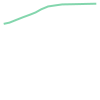

In [50]:
# seleccionamos la línea A

lineas.loc[lineas.Linea == "A", "geometry"].iloc[0]

In [51]:
#le cambiamos los indices a la linea
lineas.index = lineas.Linea

In [52]:
# eliminamos variables que no nos sirven
lineas = lineas.drop(["id", "Linea"], axis=1)
lineas

,geometry
Linea,
A,"LINESTRING (-58.46976 -34.63058, -58.46356 -34..."
B,"LINESTRING (-58.48656 -34.57423, -58.46657 -34..."
C,"LINESTRING (-58.38141 -34.62733, -58.37965 -34..."
D,"LINESTRING (-58.46197 -34.55594, -58.44392 -34..."
E,"LINESTRING (-58.46197 -34.64346, -58.44178 -34..."
H,"LINESTRING (-58.41256 -34.64110, -58.39911 -34..."


Pasamos la geometría a formato EPSG:3857. 

Este sistema de referencia es conocido como Web Mercator, y es el sistema de proyección que utilizan la mayoría de los mapas web, 
como los de Google Maps, OpenStreetMap, y Bing Maps.

El **EPSG:3857** es una **proyección cilíndrica** que presenta las **coordenadas en metros**.

In [53]:
lineas = lineas.to_crs(epsg=3857)
lineas

,geometry
Linea,
A,"LINESTRING (-6508823.622 -4113790.557, -650813..."
B,"LINESTRING (-6510694.213 -4106170.108, -650846..."
C,"LINESTRING (-6498989.025 -4113351.345, -649879..."
D,"LINESTRING (-6507956.485 -4103697.440, -650594..."
E,"LINESTRING (-6507956.399 -4115533.052, -650570..."
H,"LINESTRING (-6502456.807 -4115214.826, -650095..."


In [54]:
lineas.loc["A"]

geometry    LINESTRING (-6508823.622 -4113790.557, -650813...
Name: A, dtype: geometry

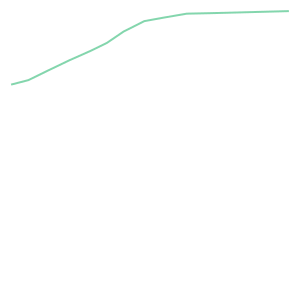

In [55]:
#ahora veamos que es más sencillo de trabajar, sin iloc ni listas de Trues y False
lineas.loc["A","geometry"]

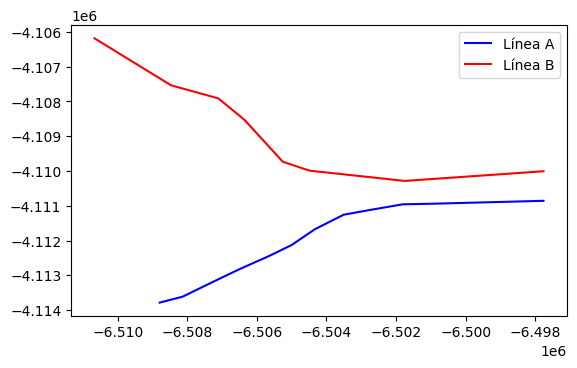

In [56]:
# Hagámoslo con dos líneas de subte

import geopandas as gpd
import matplotlib.pyplot as plt

# Supongamos que 'lineas' es tu GeoDataFrame que contiene las líneas de subte

# Seleccionar las geometrías de las líneas A y B
linea_A = lineas.loc[lineas.index == "A"]
linea_B = lineas.loc[lineas.index == "B"]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar la línea A
linea_A.plot(ax=ax, color="blue", label="Línea A")

# Graficar la línea B
linea_B.plot(ax=ax, color="red", label="Línea B")

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# <font color="#229966">Ejercicio 3</font>

a) Seleccionar las geometrías de todas las líneas de subte y guardarlas con su nombre.

b) Cambiando los colores graficar todos los recorridos.


In [57]:
# Podemos hallar la longitud de cada linea de subte
lineas.geometry.length

Linea
A    11717.038291
B    14218.739778
C     5218.620114
D    12852.386494
E    11545.716492
H     8468.993329
dtype: float64

In [58]:
# vemos que el tipo para linea de shapely es LineString
H = lineas.loc["H", "geometry"]
type(H)

shapely.geometry.linestring.LineString

In [59]:
#tiene sus propios metodos especificos a la linea
H.length

8468.993329264278

In [60]:
#y tiene varios pares de coordenadas
len(H.coords)

4

In [61]:
list(H.coords)

[(-6502456.806748704, -4115214.8261582623),
 (-6500959.194922461, -4114441.7362974873),
 (-6501710.225146143, -4110819.2934147594),
 (-6500746.616416475, -4107889.559358372)]

In [62]:
#una linea no es más que una secuencia de puntos
H.coords[0],H.coords[1]

((-6502456.806748704, -4115214.8261582623),
 (-6500959.194922461, -4114441.7362974873))

In [63]:
#podemos obtener el centroide 
#shapely se rompe para este proceso si no es 1.6.4
print(H.centroid)

POINT (-6501370.290049282 -4111874.8379560118)


In [64]:
#convertimos todo a 3857
estaciones = estaciones.to_crs(epsg=3857)


In [65]:
estaciones_H = estaciones.loc[estaciones.LINEA == "H", ["ESTACION", "geometry"]]
estaciones_H

,ESTACION,geometry
0,CASEROS,POINT (-6500938.882 -4114490.565)
1,INCLAN,POINT (-6501166.193 -4113628.148)
2,HUMBERTO 1°,POINT (-6501316.827 -4112778.132)
3,VENEZUELA,POINT (-6501584.995 -4111716.244)
4,ONCE - 30 DE DICIEMBRE,POINT (-6501730.229 -4110863.185)
76,CORRIENTES,POINT (-6501664.990 -4110261.997)
77,PARQUE PATRICIOS,POINT (-6501703.339 -4114849.892)
78,HOSPITALES,POINT (-6502436.971 -4115237.259)
83,CÓRDOBA,POINT (-6501472.537 -4109445.808)
84,LAS HERAS,POINT (-6500748.302 -4107959.183)


# <font color="#226699">LRS Lineal Referencing System</font>

Este proceso es uno de los más utilizados en análisis espacial. Fundamentalmente proyecta un punto sobre una línea siguiendo la distancia más corta, y nos indica a que distancia lineal sobre esa línea se encuentra.

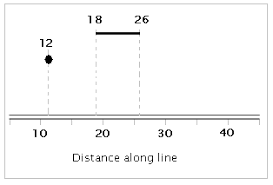

In [66]:
#importamos el objeto LineString
from shapely.geometry import LineString

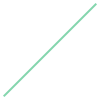

In [67]:
#creamos una linea apartir de dos puntos
lin = LineString([Point(0, 0), Point(1, 1)])
# la mostramos
lin

# Proyecciones

Proyectamos el punto con coordenadas 0.5,0.5 El método project() se utiliza para encontrar la distancia a lo largo de la línea (LineString)
desde el comienzo de la línea hasta el punto dado.

Es decir devuelve la distancia a lo largo de la línea desde el inicio hasta el punto más próximo al dado.

In [68]:
lin.project(Point(0.5, 0.5))

0.7071067811865476

In [69]:
# Si normalizamos la proyección, nos devuelve la fracción de la longitud total de la línea en lugar de la distancia absoluta.

# desde el punto de inicio de la línea hasta la proyección del punto dado.

lin.project(Point(0.5, 0.5), normalized=True)

0.5

In [70]:
#interpolamos esa distancia para ver las coordenadas del punto
print(lin.interpolate(0.707))

POINT (0.499924494298889 0.499924494298889)


## <font color="#992233">¿Qué pasó?</font>

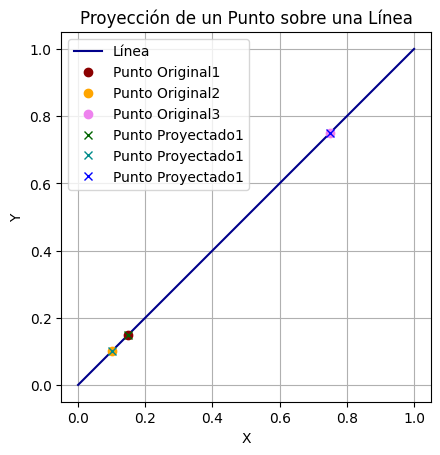

In [71]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point

# Creamos una línea y tres puntos
line = LineString([Point(0, 0), Point(1, 1)])
point1 = Point(0.15, 0.15)
point2 = Point(0.1, 0.1)
point3 = Point(0.75, 0.75)

# Proyectamos los puntos sobre la línea
projected_distance1 = line.project(point1)
projected_point1 = line.interpolate(projected_distance1)

projected_distance2 = line.project(point2)
projected_point2 = line.interpolate(projected_distance2)

projected_distance3 = line.project(point3)
projected_point3 = line.interpolate(projected_distance3)

# Graficar la línea y los puntos proyectados
fig, ax = plt.subplots()

# Graficar la línea
x, y = line.xy
ax.plot(x, y, label="Línea", color="darkblue")

# Graficar los puntos originales
ax.plot(point1.x, point1.y, "o", label="Punto Original1", color="darkred")
ax.plot(point2.x, point2.y, "o", label="Punto Original2", color="orange")
ax.plot(point3.x, point3.y, "o", label="Punto Original3", color="violet")

# Graficar los puntos proyectados
ax.plot(
    projected_point1.x,
    projected_point1.y,
    "x",
    label="Punto Proyectado1",
    color="darkgreen",
)
ax.plot(
    projected_point2.x,
    projected_point2.y,
    "x",
    label="Punto Proyectado1",
    color="darkcyan",
)
ax.plot(
    projected_point3.x, projected_point3.y, "x", label="Punto Proyectado1", color="blue"
)

# Ajustar la visualización
ax.set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Proyección de un Punto sobre una Línea")
plt.legend()
plt.grid(True)
plt.show()


# <font color="#229966">Ejercicio 4</font>

a) Definir una línea que conecte los puntos (1,2) y (3,0)

b) Para los puntos $P_1=(1.2,1.8)$, $P_2= (1.3,1.7)$ y $P_3=  (2.5,0.5)$, hallar sus proyecciones

c) Graficar los tres puntos proyectados

# <font color="226699">Las estaciones de subte son más próximas entre sí en el centro?</font>

El análisis que queremos realizar es veríficar si las estaciones de subte se encuentran más separadas entre sí en la periferia de la red que en el centro. 

También queremos poder ordenar nuestras estaciones en un gráfico de barras de acuerdo al orden que siguen en la línea. Para eso nos sirve el LRS

Necesitamos calcular la distancia de cada estación con la siguiente. Por eso necesitamos sabe el orden de esas estaciones.

In [72]:
from shapely.geometry import Point, LineString
import pandas as pd

# Señalamos la estación inicial (HOSPITALES)
estacion_inicial = estaciones_H[estaciones_H["ESTACION"] == "HOSPITALES"][
    "geometry"
].iloc[0]

# Calcular la distancia de cada estación a la estación inicial
estaciones_H["distancia_a_inicial"] = estaciones_H["geometry"].apply(
    lambda point: estacion_inicial.distance(point)
)

# Ordenar DataFrame por la distancia a la estación inicial
estaciones_H = estaciones_H.sort_values(by="distancia_a_inicial")

# Reiniciar los índices del DataFrame
estaciones_H = estaciones_H.reset_index(drop=True)

# Mostrar el DataFrame con el orden de las estaciones
print(estaciones_H)


                      ESTACION                           geometry  \
0                   HOSPITALES  POINT (-6502436.971 -4115237.259)   
1             PARQUE PATRICIOS  POINT (-6501703.339 -4114849.892)   
2                      CASEROS  POINT (-6500938.882 -4114490.565)   
3                       INCLAN  POINT (-6501166.193 -4113628.148)   
4                  HUMBERTO 1°  POINT (-6501316.827 -4112778.132)   
5                    VENEZUELA  POINT (-6501584.995 -4111716.244)   
6       ONCE - 30 DE DICIEMBRE  POINT (-6501730.229 -4110863.185)   
7                   CORRIENTES  POINT (-6501664.990 -4110261.997)   
8                      CÓRDOBA  POINT (-6501472.537 -4109445.808)   
9   SANTA FE - CARLOS JAUREGUI  POINT (-6501322.777 -4108914.382)   
10                   LAS HERAS  POINT (-6500748.302 -4107959.183)   

    distancia_a_inicial  
0              0.000000  
1            829.619463  
2           1673.864916  
3           2050.394280  
4           2702.226528  
5           362

In [73]:
# Ahora que estan ordenadas, cuál es la siguiente estacion?
estaciones_H["Siguiente"] = estaciones_H.ESTACION.shift(-1)
estaciones_H

,ESTACION,geometry,distancia_a_inicial,Siguiente
0,HOSPITALES,POINT (-6502436.971 -4115237.259),0.000000,PARQUE PATRICIOS
1,PARQUE PATRICIOS,POINT (-6501703.339 -4114849.892),829.619463,CASEROS
2,CASEROS,POINT (-6500938.882 -4114490.565),1673.864916,INCLAN
3,INCLAN,POINT (-6501166.193 -4113628.148),2050.394280,HUMBERTO 1°
4,HUMBERTO 1°,POINT (-6501316.827 -4112778.132),2702.226528,VENEZUELA
5,VENEZUELA,POINT (-6501584.995 -4111716.244),3622.624853,ONCE - 30 DE DICIEMBRE
6,ONCE - 30 DE DICIEMBRE,POINT (-6501730.229 -4110863.185),4430.802660,CORRIENTES
7,CORRIENTES,POINT (-6501664.990 -4110261.997),5034.797967,CÓRDOBA
8,CÓRDOBA,POINT (-6501472.537 -4109445.808),5871.204673,SANTA FE - CARLOS JAUREGUI
9,SANTA FE - CARLOS JAUREGUI,POINT (-6501322.777 -4108914.382),6420.295998,LAS HERAS


In [74]:
# calculamos la distancia de cada estacion con respecto a su siguiente
# sabemos que tenemos que repetir esto por cada estacion menos 1 (la ultima tiene distancia a la nada)
list(range(len(estaciones_H) - 1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [75]:
#podemos ver las estaciones recorriendo este rango
for i in range(len(estaciones_H)):
    print(estaciones_H.ESTACION.iloc[i])
    

HOSPITALES
PARQUE PATRICIOS
CASEROS
INCLAN
HUMBERTO 1°
VENEZUELA
ONCE - 30 DE DICIEMBRE
CORRIENTES
CÓRDOBA
SANTA FE - CARLOS JAUREGUI
LAS HERAS


In [76]:
# no siempre tenemos que guardar todo en el data frame, en especial variables que van a ser insumo
estacion_siguiente = estaciones_H.geometry.shift(-1)
# usamos esto para calcular la distancia a la estación siguiente
distancias = [
    estaciones_H.geometry.iloc[i].distance(estacion_siguiente.iloc[i])
    for i in range(len(estaciones_H) - 1)
]

In [77]:
# asignamos 0 a la distancia de la última al siguiente

estaciones_H["distancia_siguiente"] = distancias + [0]
estaciones_H

,ESTACION,geometry,distancia_a_inicial,Siguiente,distancia_siguiente
0,HOSPITALES,POINT (-6502436.971 -4115237.259),0.000000,PARQUE PATRICIOS,829.619463
1,PARQUE PATRICIOS,POINT (-6501703.339 -4114849.892),829.619463,CASEROS,844.696193
2,CASEROS,POINT (-6500938.882 -4114490.565),1673.864916,INCLAN,891.871064
3,INCLAN,POINT (-6501166.193 -4113628.148),2050.394280,HUMBERTO 1°,863.259957
4,HUMBERTO 1°,POINT (-6501316.827 -4112778.132),2702.226528,VENEZUELA,1095.225718
5,VENEZUELA,POINT (-6501584.995 -4111716.244),3622.624853,ONCE - 30 DE DICIEMBRE,865.334388
6,ONCE - 30 DE DICIEMBRE,POINT (-6501730.229 -4110863.185),4430.802660,CORRIENTES,604.717270
7,CORRIENTES,POINT (-6501664.990 -4110261.997),5034.797967,CÓRDOBA,838.571944
8,CÓRDOBA,POINT (-6501472.537 -4109445.808),5871.204673,SANTA FE - CARLOS JAUREGUI,552.124082
9,SANTA FE - CARLOS JAUREGUI,POINT (-6501322.777 -4108914.382),6420.295998,LAS HERAS,1114.641993


In [78]:
# siguiendo el mismo procedimiento, podemos construir una linea a partir de cada estación con la siguiente
lineas_nuevas = [
    LineString([estaciones_H.geometry.loc[i], estacion_siguiente.loc[i]])
    for i in estaciones_H.index[:-1]
]
lineas_nuevas

[<LINESTRING (-6502436.971 -4115237.259, -6501703.339 -4114849.892)>,
 <LINESTRING (-6501703.339 -4114849.892, -6500938.882 -4114490.565)>,
 <LINESTRING (-6500938.882 -4114490.565, -6501166.193 -4113628.148)>,
 <LINESTRING (-6501166.193 -4113628.148, -6501316.827 -4112778.132)>,
 <LINESTRING (-6501316.827 -4112778.132, -6501584.995 -4111716.244)>,
 <LINESTRING (-6501584.995 -4111716.244, -6501730.229 -4110863.185)>,
 <LINESTRING (-6501730.229 -4110863.185, -6501664.99 -4110261.997)>,
 <LINESTRING (-6501664.99 -4110261.997, -6501472.537 -4109445.808)>,
 <LINESTRING (-6501472.537 -4109445.808, -6501322.777 -4108914.382)>,
 <LINESTRING (-6501322.777 -4108914.382, -6500748.302 -4107959.183)>]

In [79]:
# creamos un data frame con lineas y la distancia
nuevaH = pd.DataFrame({"lineas": lineas_nuevas, "distancia": distancias})
type(nuevaH)


pandas.core.frame.DataFrame

In [80]:
nuevaH

,lineas,distancia
0,LINESTRING (-6502436.971052213 -4115237.259212...,829.619463
1,LINESTRING (-6501703.339403232 -4114849.892387...,844.696193
2,LINESTRING (-6500938.8816755405 -4114490.56518...,891.871064
3,LINESTRING (-6501166.192809229 -4113628.147854...,863.259957
4,LINESTRING (-6501316.827495229 -4112778.132004...,1095.225718
5,LINESTRING (-6501584.994597421 -4111716.244167...,865.334388
6,LINESTRING (-6501730.229190245 -4110863.184664...,604.717270
7,LINESTRING (-6501664.990118698 -4110261.996806...,838.571944
8,LINESTRING (-6501472.537415725 -4109445.807574...,552.124082
9,LINESTRING (-6501322.776922103 -4108914.382324...,1114.641993


In [81]:
# la convertirmos en GeoDataFrame
nuevaH = gpd.GeoDataFrame(nuevaH, geometry="lineas", crs={"init": "epsg:3857"})
type(nuevaH)

geopandas.geodataframe.GeoDataFrame

<Axes: >

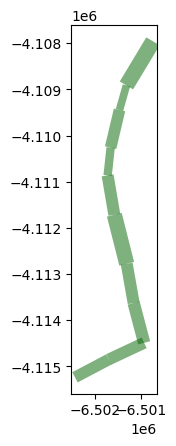

In [82]:
# visualizamos el resultado
nuevaH.plot(linewidth=nuevaH.distancia / 100, color="darkgreen", alpha=0.5)

# <font color="#226699">Group by- Apply</font>

Ya resolvimos el problema para la línea H. Ahora solamente tenemos que aplicar el mismo método y resolverlo para todas las líneas. Podríamos hacer un for loop iterando a lo largo de todas las líneas, y poner todo el proceso en un loop, e ir guardando los resultados.

Pero para esta situación donde tenemos registros en una tabla identificados por un valor en común, y queremos realizar el mismo proceso para cada grupo, existe Group By. 



 

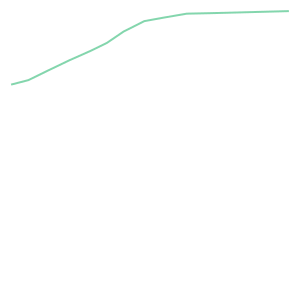

In [83]:
dt = estaciones.loc[estaciones.LINEA == "A", :]
linea = lineas.loc["A", "geometry"]
linea

In [84]:
linea.project(dt.geometry.iloc[0], normalized=True)

0.9605277831993329

In [85]:
dt.loc[:, "orden"] = dt.geometry.map(
    lambda estacion: linea.project(estacion, normalized=False)
)
dt


,ID,ESTACION,LINEA,geometry,x,y,ym,xm,distancia_obelisco,orden
30,31.0,PERU,A,POINT (-6498193.759 -4110812.307),-58.374268,-34.608559,-4.110812e+06,-6.498194e+06,1025.487383,11254.540816
31,32.0,PIEDRAS,A,POINT (-6498730.032 -4110855.946),-58.379085,-34.608882,-4.110856e+06,-6.498730e+06,688.520629,10717.307897
32,33.0,LIMA,A,POINT (-6499080.382 -4110885.443),-58.382232,-34.609100,-4.110885e+06,-6.499080e+06,640.846108,10366.305184
33,34.0,SAENZ PEÑA,A,POINT (-6499586.306 -4110927.747),-58.386777,-34.609413,-4.110928e+06,-6.499586e+06,868.935154,9859.446242
34,35.0,CONGRESO,A,POINT (-6500242.160 -4110902.468),-58.392669,-34.609226,-4.110902e+06,-6.500242e+06,1362.732195,9204.480654
35,36.0,PASCO,A,POINT (-6500883.156 -4110959.312),-58.398427,-34.609646,-4.110959e+06,-6.500883e+06,1968.848969,8562.321320
36,37.0,ALBERTI,A,POINT (-6501192.684 -4110984.688),-58.401208,-34.609834,-4.110985e+06,-6.501193e+06,2268.244055,8252.326282
37,38.0,PLAZA DE MISERERE,A,POINT (-6501804.895 -4110982.479),-58.406707,-34.609817,-4.110982e+06,-6.501805e+06,2853.436840,7640.298451
38,39.0,LORIA,A,POINT (-6502748.728 -4111112.925),-58.415186,-34.610782,-4.111113e+06,-6.502749e+06,3800.758394,6684.364848
39,40.0,CASTRO BARROS,A,POINT (-6503486.772 -4111246.631),-58.421816,-34.611770,-4.111247e+06,-6.503487e+06,4549.999479,5934.307297


In [86]:
import geopandas as gpd
from shapely.geometry import LineString


def distancia_entre_estaciones(dt, lineas):
    """
    Esta función produce un GeoDataFrame con líneas entre estaciones
    de subte con la distancia en metros entre ellas.

    Argumentos
    ---------
    dt     : geopandas.GeoDataFrame
             GeoDataFrame que contiene las estaciones de subte
    lineas : geopandas.GeoDataFrame
             GeoDataFrame que contiene las líneas de subte

    Devuelve
    -------
    nuevo_dt: GeoDataFrame
             GeoDataFrame que contiene las líneas entre estaciones
             con la distancia entre ellas en metros
    """
    # Crear un diccionario con colores
    colores = {
        "A": "lightblue",
        "B": "red",
        "C": "blue",
        "D": "green",
        "E": "purple",
        "H": "gold",
    }

    # Tomar la línea del subset de datos como el valor único que hay en el campo LINEA
    linea_letra = dt.LINEA.unique()[0]
    # Tomar el color para graficar en base a esa línea
    color = colores[linea_letra]

    # Tomar la línea de subte en su geometría para el LRS
    linea = lineas.loc[linea_letra, "geometry"]

    # Limpiar el subset de datos quedándome con pocas columnas
    dt = dt.reindex(columns=["ESTACION", "LINEA", "geometry"])

    # Proyectar cada estación en la línea y guardarla en orden
    dt["orden"] = dt.geometry.map(
        lambda estacion: linea.project(estacion, normalized=False)
    )

    # Ordenar por ese orden y reiniciar el índice
    dt = dt.sort_values(by="orden")
    dt = dt.reset_index(drop=True)

    # Obtener la estación siguiente con un shift
    estacion_siguiente = dt.geometry.shift(-1)

    # Calcular las distancias a la estación siguiente
    distancias = [
        dt.geometry.loc[i].distance(estacion_siguiente.loc[i]) for i in dt.index[:-1]
    ]

    # Construir una línea entre cada estación y la siguiente
    lineas_nuevas = [
        LineString([dt.geometry.loc[i], estacion_siguiente.loc[i]])
        for i in dt.index[:-1]
    ]

    # Crear el GeoDataFrame final
    nuevo_dt = gpd.GeoDataFrame({"geometry": lineas_nuevas, "distancia": distancias})
    # Establecer el CRS correctamente
    nuevo_dt.crs = lineas.crs

    # Asignar el color
    nuevo_dt["color"] = color

    return nuevo_dt


# Aplicar la función distancia_entre_estaciones a cada grupo de estaciones por línea de subte
lineas_subte = estaciones.groupby("LINEA").apply(
    lambda x: distancia_entre_estaciones(x, lineas)
)
# Eliminar el nivel del índice que no nos interesa
lineas_subte.index = lineas_subte.index.droplevel(1)
lineas_subte.head()

,geometry,distancia,color
LINEA,,,
A,"LINESTRING (-6508810.510 -4113808.273, -650813...",713.441720,lightblue
A,"LINESTRING (-6508131.560 -4113589.127, -650737...",827.908948,lightblue
A,"LINESTRING (-6507371.168 -4113261.655, -650647...",992.785448,lightblue
A,"LINESTRING (-6506473.694 -4112837.198, -650564...",932.764367,lightblue
A,"LINESTRING (-6505642.135 -4112414.637, -650511...",601.775978,lightblue


<Axes: >

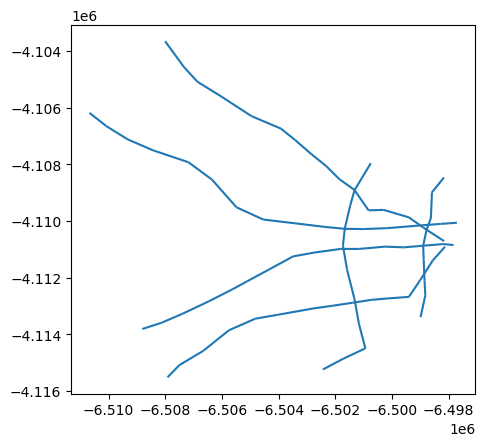

In [87]:
lineas_subte.plot()

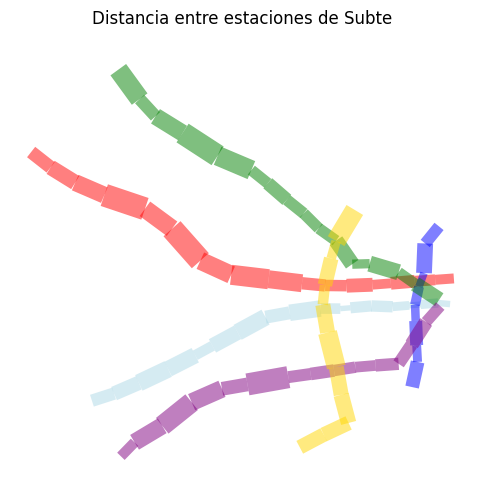

In [88]:
# veamoslo en un mapa
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

lineas_subte.plot(
    color=lineas_subte.color, linewidth=lineas_subte.distancia / 80, alpha=0.5, ax=ax
)
ax.set_axis_off()
plt.axis("equal")
ax.set_title("Distancia entre estaciones de Subte")
fig.savefig("plot_distancia_lineas.png")